In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- 봄: 2021년 3, 4, 5
- 여름: 2020년 6, 7, 8
- 가을: 2020년 9, 10, 11
- 겨울: 2020년 12, 2021년 1, 2

In [2]:
df_new1 = pd.read_csv('./data/공공자전거 대여이력_2020.06.csv', engine = 'python')
df_new2 = pd.read_csv('./data/공공자전거 대여이력_2020.07.csv', engine = 'python')
df_new3 = pd.read_csv('./data/공공자전거 대여이력_2020.08.csv', engine = 'python')

In [3]:
df_new = pd.merge(df_new1, df_new2, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new = pd.merge(df_new, df_new3, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36260,2020-06-01 00:00:35,1681,현대6차 아파트,0,2020-06-01 00:05:24,1665,양지근린공원앞,0,5,0.0
1,SPB-36146,2020-06-01 00:01:47,816,신용산역 6번출구 앞,0,2020-06-01 00:05:54,829,베르가모앞,0,4,0.0
2,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.0
3,SPB-35969,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),0,2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),0,2,0.0
4,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6985342,SPB-36683,2020-08-31 23:59:47,519,양지사거리,0,2020-09-01 00:09:02,378,청계7가 사거리,0,9,0.0
6985343,SPB-37010,2020-08-31 23:59:50,2228,뒷벌공원 옆,0,2020-09-01 00:03:32,2264,이수역 1번출구,0,4,0.0
6985344,SPB-41286,2020-08-31 23:59:54,130,신촌역(2호선) 7번출구 앞,0,2020-09-01 00:24:55,170,가재울 뉴타운 주유소 옆,0,25,0.0
6985345,SPB-40184,2020-08-31 23:59:55,502,뚝섬유원지역 1번출구 앞,0,2020-09-01 00:50:40,502,뚝섬유원지역 1번출구 앞,0,51,0.0


In [4]:
df_new['대여대여소명'].unique()

array(['현대6차 아파트', '신용산역 6번출구 앞', '둔촌역 3번 출입구', ..., '성동광진 교육지원??앞',
       '염?℉?한마음아파트앞(염창동 빛나는 음악학원앞)', '연대 정문앞'], dtype=object)

In [5]:
df = df_new[~df_new['대여대여소명'].str.contains('\?')]
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36260,2020-06-01 00:00:35,1681,현대6차 아파트,0,2020-06-01 00:05:24,1665,양지근린공원앞,0,5,0.0
1,SPB-36146,2020-06-01 00:01:47,816,신용산역 6번출구 앞,0,2020-06-01 00:05:54,829,베르가모앞,0,4,0.0
2,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.0
3,SPB-35969,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),0,2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),0,2,0.0
4,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6985342,SPB-36683,2020-08-31 23:59:47,519,양지사거리,0,2020-09-01 00:09:02,378,청계7가 사거리,0,9,0.0
6985343,SPB-37010,2020-08-31 23:59:50,2228,뒷벌공원 옆,0,2020-09-01 00:03:32,2264,이수역 1번출구,0,4,0.0
6985344,SPB-41286,2020-08-31 23:59:54,130,신촌역(2호선) 7번출구 앞,0,2020-09-01 00:24:55,170,가재울 뉴타운 주유소 옆,0,25,0.0
6985345,SPB-40184,2020-08-31 23:59:55,502,뚝섬유원지역 1번출구 앞,0,2020-09-01 00:50:40,502,뚝섬유원지역 1번출구 앞,0,51,0.0


In [6]:
df['대여대여소명'].unique()

array(['현대6차 아파트', '신용산역 6번출구 앞', '둔촌역 3번 출입구', ..., '동양쇼핑 정류소 앞',
       '신사두산위브2차아파트 앞', '연대 정문앞'], dtype=object)

In [7]:
df['반납대여소명'].unique()

array(['양지근린공원앞', '베르가모앞', '둔촌사거리', ..., '?옙탄늉?맞은편', '도봉?맡?옆(중랑천변)',
       '?慕括珉린?사거리'], dtype=object)

In [8]:
df_new = df[~df['반납대여소명'].str.contains('\?')]
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36260,2020-06-01 00:00:35,1681,현대6차 아파트,0,2020-06-01 00:05:24,1665,양지근린공원앞,0,5,0.0
1,SPB-36146,2020-06-01 00:01:47,816,신용산역 6번출구 앞,0,2020-06-01 00:05:54,829,베르가모앞,0,4,0.0
2,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.0
3,SPB-35969,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),0,2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),0,2,0.0
4,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6985342,SPB-36683,2020-08-31 23:59:47,519,양지사거리,0,2020-09-01 00:09:02,378,청계7가 사거리,0,9,0.0
6985343,SPB-37010,2020-08-31 23:59:50,2228,뒷벌공원 옆,0,2020-09-01 00:03:32,2264,이수역 1번출구,0,4,0.0
6985344,SPB-41286,2020-08-31 23:59:54,130,신촌역(2호선) 7번출구 앞,0,2020-09-01 00:24:55,170,가재울 뉴타운 주유소 옆,0,25,0.0
6985345,SPB-40184,2020-08-31 23:59:55,502,뚝섬유원지역 1번출구 앞,0,2020-09-01 00:50:40,502,뚝섬유원지역 1번출구 앞,0,51,0.0


In [9]:
df_new['반납대여소명'].unique()

array(['양지근린공원앞', '베르가모앞', '둔촌사거리', ..., '서울지방고용노동청 앞', '신사두산위브2차아파트 앞',
       '동양쇼핑 정류소 앞'], dtype=object)

In [10]:
df_new = df_new.drop(['자전거번호', '대여거치대', '반납거치대', '이용거리'], axis = 1)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간
0,2020-06-01 00:00:35,1681,현대6차 아파트,2020-06-01 00:05:24,1665,양지근린공원앞,5
1,2020-06-01 00:01:47,816,신용산역 6번출구 앞,2020-06-01 00:05:54,829,베르가모앞,4
2,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,2020-06-01 00:05:59,1078,둔촌사거리,3
3,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),2
4,2020-06-01 00:00:46,1132,등촌역 7번출구,2020-06-01 00:06:53,1169,염창역 1번 출구,6


In [11]:
df_new['대여일시'] = pd.to_datetime(df_new['대여일시'])
df_new['반납일시'] = pd.to_datetime(df_new['반납일시'])

df_new['대여월'] = df_new['대여일시'].dt.month
df_new['대여일'] = df_new['대여일시'].dt.day
df_new['대여요일'] = df_new['대여일시'].dt.dayofweek
df_new['대여시간'] = df_new['대여일시'].dt.hour
df_new['대여시간_분'] = df_new['대여일시'].dt.minute

df_new['반납월'] = df_new['반납일시'].dt.month
df_new['반납일'] = df_new['반납일시'].dt.day
df_new['반납요일'] = df_new['반납일시'].dt.dayofweek
df_new['반납시간'] = df_new['반납일시'].dt.hour
df_new['반납시간_분'] = df_new['반납일시'].dt.minute

In [12]:
df_new = df_new.sort_values('대여일시', ignore_index = True)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:00:00,106,합정역 7번출구 앞,2020-06-01 00:41:00,830,청암자이아파트앞,40,6,1,0,0,0,6,1,0,0,41
1,2020-06-01 00:00:16,956,응암시장교차로,2020-06-01 00:08:25,939,은평구청 교차로,7,6,1,0,0,0,6,1,0,0,8
2,2020-06-01 00:00:24,2340,삼호물산버스정류장(23370) 옆,2020-06-01 00:14:50,2263,바우뫼문화복지회관,13,6,1,0,0,0,6,1,0,0,14
3,2020-06-01 00:00:26,1057,능골근린공원,2020-06-01 00:07:13,1057,능골근린공원,7,6,1,0,0,0,6,1,0,0,7
4,2020-06-01 00:00:32,3511,응봉역 1번출구,2020-06-01 00:21:38,362,청계8가 사거리,21,6,1,0,0,0,6,1,0,0,21


In [13]:
df_new = df_new[df_new['대여월'] != 5]

In [14]:
df_rental = df_new[['대여일시', '대여대여소명','대여대여소번호', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여대여소번호,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,106,6,1,0,0,0
1,2020-06-01 00:00:16,응암시장교차로,956,6,1,0,0,0
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,2340,6,1,0,0,0
3,2020-06-01 00:00:26,능골근린공원,1057,6,1,0,0,0
4,2020-06-01 00:00:32,응봉역 1번출구,3511,6,1,0,0,0


In [15]:
df_rental2 = df_rental.groupby(['대여대여소명','대여대여소번호','대여시간']).size().reset_index().rename(columns = {0 : 'rent_count'})
df_rental2['rent_count'] = df_rental2['rent_count'] / 92     # 6월, 7월, 8월 합친 것이므로 나누기 92
df_rental2['mu_15'] = df_rental2['rent_count'] / 4
df_rental2

,대여대여소명,대여대여소번호,대여시간,rent_count,mu_15
0,(구)신한은행 중랑교지점,1442,0,2.478261,0.619565
1,(구)신한은행 중랑교지점,1442,1,2.043478,0.510870
2,(구)신한은행 중랑교지점,1442,2,1.652174,0.413043
3,(구)신한은행 중랑교지점,1442,3,0.945652,0.236413
4,(구)신한은행 중랑교지점,1442,4,0.663043,0.165761
...,...,...,...,...,...
49447,힐스테이트에코,2720,19,4.804348,1.201087
49448,힐스테이트에코,2720,20,4.706522,1.176630
49449,힐스테이트에코,2720,21,3.815217,0.953804
49450,힐스테이트에코,2720,22,2.880435,0.720109


In [16]:
df_return = df_new[['반납일시', '반납대여소명', '반납대여소번호','반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.reset_index(drop = True, inplace = True)
df_return

,반납일시,반납대여소명,반납대여소번호,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:41:00,청암자이아파트앞,830,6,1,0,0,41
1,2020-06-01 00:08:25,은평구청 교차로,939,6,1,0,0,8
2,2020-06-01 00:14:50,바우뫼문화복지회관,2263,6,1,0,0,14
3,2020-06-01 00:07:13,능골근린공원,1057,6,1,0,0,7
4,2020-06-01 00:21:38,청계8가 사거리,362,6,1,0,0,21
...,...,...,...,...,...,...,...,...
6970895,2020-09-01 00:09:02,청계7가 사거리,378,9,1,1,0,9
6970896,2020-09-01 00:03:32,이수역 1번출구,2264,9,1,1,0,3
6970897,2020-09-01 00:24:55,가재울 뉴타운 주유소 옆,170,9,1,1,0,24
6970898,2020-09-01 00:50:40,뚝섬유원지역 1번출구 앞,502,9,1,1,0,50


In [17]:
df_c = df_return.groupby(['반납대여소명','반납대여소번호','반납시간']).size().reset_index().rename(columns = {0 : 'return_count'})
df_c['return_count'] = df_c['return_count'] / 92     # 6월, 7월, 8월 합친 것이므로 나누기 92
df_c['lambda15'] = df_c['return_count']/ 4
df_c = df_c.sort_values('lambda15', ascending = False).reset_index(drop = True)
df_c.columns = ['대여소명','대여소번호','시간','return_count','lambda15']
df_c

,대여소명,대여소번호,시간,return_count,lambda15
0,뚝섬유원지역 1번출구 앞,502,20,57.108696,14.277174
1,뚝섬유원지역 1번출구 앞,502,21,56.402174,14.100543
2,여의나루역 1번출구 앞,207,21,51.402174,12.850543
3,뚝섬유원지역 1번출구 앞,502,22,47.673913,11.918478
4,여의나루역 1번출구 앞,207,20,46.771739,11.692935
...,...,...,...,...,...
49316,돈암삼성풍림아파트,1392,2,0.010870,0.002717
49317,창신두산아파트,3401,3,0.010870,0.002717
49318,돈암삼성풍림아파트,1392,4,0.010870,0.002717
49319,광나루안전체험관,3573,6,0.010870,0.002717


In [18]:
return_ubound = pd.DataFrame(df_c.groupby(['대여소명','대여소번호'])['return_count'].agg(lambda x : np.floor(np.percentile(x,75)+(np.percentile(x,75)-np.percentile(x,25))*1.5))).reset_index().rename(columns = {'return_count' : 'upperbound'})
return_ubound

,대여소명,대여소번호,upperbound
0,(구)신한은행 중랑교지점,1442,7.0
1,(구)합정동 주민센터,101,3.0
2,(시립)고덕평생학습관,1070,0.0
3,(재)FITI시험연구원,2724,4.0
4,3호선 매봉역 3번출구앞,2335,3.0
...,...,...,...
2091,흑석한강푸르지오 106동앞,2064,1.0
2092,흑석한강푸르지오(110동),2092,0.0
2093,흥국사 정류장,991,0.0
2094,희성오피앙,1639,6.0


In [19]:
df_rental2.columns = ['대여소명','대여소번호','시간','rent_count','mu_15']
df = pd.merge(df_c, df_rental2, on=['대여소명','대여소번호','시간'], how='outer')
df.tail()

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15
49720,흑석한강푸르지오 106동앞,2064,6,NaN,NaN,0.489130,0.122283
49721,흑석한강푸르지오(110동),2092,1,NaN,NaN,0.065217,0.016304
49722,흑석한강푸르지오(110동),2092,4,NaN,NaN,0.010870,0.002717
49723,흑석한강푸르지오(110동),2092,8,NaN,NaN,0.304348,0.076087
49724,흥국사 정류장,991,4,NaN,NaN,0.010870,0.002717


In [20]:
stops = df[['대여소명','대여소번호']].drop_duplicates().reset_index(drop=True)
Dayhour = pd.DataFrame({'시간':np.repeat(np.arange(24), len(stops))})
stops2 = pd.concat([stops] * 24).reset_index(drop=True)
Dayhour_frame = pd.concat([stops2,Dayhour],axis=1)

In [21]:
df = pd.merge(df,Dayhour_frame, on = ['대여소명','대여소번호','시간'],how='outer')
df = pd.merge(df, return_ubound, on=['대여소명','대여소번호'], how='outer')
df.fillna(0, inplace=True)
df.head(5)

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,뚝섬유원지역 1번출구 앞,502,20,57.108696,14.277174,48.902174,12.225543,58.0
1,뚝섬유원지역 1번출구 앞,502,21,56.402174,14.100543,54.076087,13.519022,58.0
2,뚝섬유원지역 1번출구 앞,502,22,47.673913,11.918478,46.760870,11.690217,58.0
3,뚝섬유원지역 1번출구 앞,502,19,46.532609,11.633152,42.739130,10.684783,58.0
4,뚝섬유원지역 1번출구 앞,502,18,39.315217,9.828804,36.402174,9.100543,58.0


In [22]:
df = df.sort_values(['대여소명', '대여소번호', '시간'], ignore_index = True)
df

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,(구)신한은행 중랑교지점,1442,0,2.978261,0.744565,2.478261,0.619565,7.0
1,(구)신한은행 중랑교지점,1442,1,2.673913,0.668478,2.043478,0.510870,7.0
2,(구)신한은행 중랑교지점,1442,2,1.782609,0.445652,1.652174,0.413043,7.0
3,(구)신한은행 중랑교지점,1442,3,1.293478,0.323370,0.945652,0.236413,7.0
4,(구)신한은행 중랑교지점,1442,4,0.945652,0.236413,0.663043,0.165761,7.0
...,...,...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,4.706522,1.176630,4.804348,1.201087,8.0
50396,힐스테이트에코,2720,20,3.934783,0.983696,4.706522,1.176630,8.0
50397,힐스테이트에코,2720,21,3.826087,0.956522,3.815217,0.953804,8.0
50398,힐스테이트에코,2720,22,2.576087,0.644022,2.880435,0.720109,8.0


In [23]:
df = df.drop(['return_count', 'rent_count'], axis = 1)
df = df.rename(columns = {'lambda15' : 'lambda_15', 'upperbound' : 'c'})
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0
...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,1.176630,1.201087,8.0
50396,힐스테이트에코,2720,20,0.983696,1.176630,8.0
50397,힐스테이트에코,2720,21,0.956522,0.953804,8.0
50398,힐스테이트에코,2720,22,0.644022,0.720109,8.0


In [24]:
df['rho'] = float(-1)

for i in range(len(df)):
    if df['mu_15'][i] == 0:
        df['rho'][i] = 0
    else:
        df['rho'][i] = df['lambda_15'][i] / df['mu_15'][i]
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0,1.201754
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0,1.308511
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0,1.078947
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0,1.367816
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0,1.426230
...,...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,1.176630,1.201087,8.0,0.979638
50396,힐스테이트에코,2720,20,0.983696,1.176630,8.0,0.836028
50397,힐스테이트에코,2720,21,0.956522,0.953804,8.0,1.002849
50398,힐스테이트에코,2720,22,0.644022,0.720109,8.0,0.894340


In [25]:
# p_c: 대여소에 자전거가 c개(최대거치용량) 있을 확률

df['p_c'] = float(-1)

for i in range(len(df)):
    if df['rho'][i] == 1:
        df['p_c'][i] = 1 / (1 + df['c'][i]) 
    else:
        df['p_c'][i] = (df['rho'][i]**df['c'][i]) * ((1 - df['rho'][i]) / (1 - (df['rho'][i]**(df['c'][i] + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0,1.201754,0.217992
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0,1.308511,0.266818
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0,1.078947,0.160638
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0,1.367816,0.292805
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0,1.426230,0.317389
...,...,...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,1.176630,1.201087,8.0,0.979638,0.102190
50396,힐스테이트에코,2720,20,0.983696,1.176630,8.0,0.836028,0.048886
50397,힐스테이트에코,2720,21,0.956522,0.953804,8.0,1.002849,0.112380
50398,힐스테이트에코,2720,22,0.644022,0.720109,8.0,0.894340,0.068213


In [26]:
# L_s : 대여소 내 평균 자전거 수

df['L_s'] = float(-1)

for i in range(len(df)):
    rho = df['rho'][i]
    c = df['c'][i]
    if df['rho'][i] == 1:
        df['L_s'][i] = c / 2
    else:
        df['L_s'][i] = (rho / (1 - rho)) * ((1 - ((c + 1) * rho**c) + (c * rho**(c + 1))) / (1 - (rho**(c + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0,1.201754,0.217992,4.431278
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0,1.308511,0.266818,4.812022
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0,1.078947,0.160638,3.896452
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0,1.367816,0.292805,4.992209
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0,1.426230,0.317389,5.150110
...,...,...,...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,1.176630,1.201087,8.0,0.979638,0.102190,3.862932
50396,힐스테이트에코,2720,20,0.983696,1.176630,8.0,0.836028,0.048886,2.855340
50397,힐스테이트에코,2720,21,0.956522,0.953804,8.0,1.002849,0.112380,4.018966
50398,힐스테이트에코,2720,22,0.644022,0.720109,8.0,0.894340,0.068213,3.267925


In [27]:
# L_q : 대기행렬 내 평균 자전거 수

df['L_q'] = float(-1)

for i in range(len(df)):
    df['L_q'][i] = df['L_s'][i] - (df['rho'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0,1.201754,0.217992,4.431278,3.491496
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0,1.308511,0.266818,4.812022,3.852645
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0,1.078947,0.160638,3.896452,2.990825
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0,1.367816,0.292805,4.992209,4.024896
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0,1.426230,0.317389,5.150110,4.176550
...,...,...,...,...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,1.176630,1.201087,8.0,0.979638,0.102190,3.862932,2.983403
50396,힐스테이트에코,2720,20,0.983696,1.176630,8.0,0.836028,0.048886,2.855340,2.060182
50397,힐스테이트에코,2720,21,0.956522,0.953804,8.0,1.002849,0.112380,4.018966,3.128817
50398,힐스테이트에코,2720,22,0.644022,0.720109,8.0,0.894340,0.068213,3.267925,2.434591


In [28]:
# W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

df['W_s'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_s'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_s'][i] = df['L_s'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0,1.201754,0.217992,4.431278,3.491496,7.610533
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0,1.308511,0.266818,4.812022,3.852645,9.818119
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0,1.078947,0.160638,3.896452,2.990825,10.416557
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0,1.367816,0.292805,4.992209,4.024896,21.830043
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0,1.426230,0.317389,5.150110,4.176550,31.913313
...,...,...,...,...,...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,1.176630,1.201087,8.0,0.979638,0.102190,3.862932,2.983403,3.656726
50396,힐스테이트에코,2720,20,0.983696,1.176630,8.0,0.836028,0.048886,2.855340,2.060182,3.051859
50397,힐스테이트에코,2720,21,0.956522,0.953804,8.0,1.002849,0.112380,4.018966,3.128817,4.733608
50398,힐스테이트에코,2720,22,0.644022,0.720109,8.0,0.894340,0.068213,3.267925,2.434591,5.445715


In [29]:
# W_q : 대기행렬 내 평균대기시간

df['W_q'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_q'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_q'][i] = df['L_q'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0,1.201754,0.217992,4.431278,3.491496,7.610533,5.996498
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0,1.308511,0.266818,4.812022,3.852645,9.818119,7.860673
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0,1.078947,0.160638,3.896452,2.990825,10.416557,7.995504
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0,1.367816,0.292805,4.992209,4.024896,21.830043,17.600158
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0,1.426230,0.317389,5.150110,4.176550,31.913313,25.880526
...,...,...,...,...,...,...,...,...,...,...,...,...
50395,힐스테이트에코,2720,19,1.176630,1.201087,8.0,0.979638,0.102190,3.862932,2.983403,3.656726,2.824147
50396,힐스테이트에코,2720,20,0.983696,1.176630,8.0,0.836028,0.048886,2.855340,2.060182,3.051859,2.201975
50397,힐스테이트에코,2720,21,0.956522,0.953804,8.0,1.002849,0.112380,4.018966,3.128817,4.733608,3.685175
50398,힐스테이트에코,2720,22,0.644022,0.720109,8.0,0.894340,0.068213,3.267925,2.434591,5.445715,4.057036


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소명       50400 non-null  object 
 1   대여소번호      50400 non-null  int64  
 2   시간         50400 non-null  int64  
 3   lambda_15  50400 non-null  float64
 4   mu_15      50400 non-null  float64
 5   c          50400 non-null  float64
 6   rho        50400 non-null  float64
 7   p_c        50400 non-null  float64
 8   L_s        50400 non-null  float64
 9   L_q        50400 non-null  float64
 10  W_s        50400 non-null  float64
 11  W_q        50400 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In [31]:
# 일부 칼럼 타입 카테고리로 변환

df = df.astype({'대여소명' : 'category', '대여소번호' : 'category'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소명       50400 non-null  category
 1   대여소번호      50400 non-null  category
 2   시간         50400 non-null  int64   
 3   lambda_15  50400 non-null  float64 
 4   mu_15      50400 non-null  float64 
 5   c          50400 non-null  float64 
 6   rho        50400 non-null  float64 
 7   p_c        50400 non-null  float64 
 8   L_s        50400 non-null  float64 
 9   L_q        50400 non-null  float64 
 10  W_s        50400 non-null  float64 
 11  W_q        50400 non-null  float64 
dtypes: category(2), float64(9), int64(1)
memory usage: 4.2 MB


In [33]:
station = pd.read_csv('./대학원/데이터/정리 데이터/공공자전거 대여소 정보(21.06월 기준).csv')
station.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [34]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소 번호     2467 non-null   int64  
 1   보관소(대여소)명  2467 non-null   object 
 2   자치구        2467 non-null   object 
 3   상세주소       2467 non-null   object 
 4   위도         2467 non-null   float64
 5   경도         2467 non-null   float64
 6   설치 시기      2467 non-null   object 
 7   LCD 거치대수   1454 non-null   float64
 8   QR 거치대수    1014 non-null   float64
 9   운영 방식      2467 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 192.9+ KB


In [35]:
station = station.astype({'자치구' : 'category', '대여소 번호' : 'category'})

In [36]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소 번호     2467 non-null   category
 1   보관소(대여소)명  2467 non-null   object  
 2   자치구        2467 non-null   category
 3   상세주소       2467 non-null   object  
 4   위도         2467 non-null   float64 
 5   경도         2467 non-null   float64 
 6   설치 시기      2467 non-null   object  
 7   LCD 거치대수   1454 non-null   float64 
 8   QR 거치대수    1014 non-null   float64 
 9   운영 방식      2467 non-null   object  
dtypes: category(2), float64(4), object(4)
memory usage: 261.6+ KB


In [37]:
station = station.rename(columns = {'대여소 번호' : '대여소번호'})
station

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2462,4864,송파사거리,송파구,송파구 송파동 97-2,37.502056,127.110550,2021-04-27,NaN,6.0,QR
2463,4865,한성백제역 1번출구 뒤,송파구,송파구 방이동 45-4,37.516342,127.115593,2021-04-28,NaN,5.0,QR
2464,4867,가락대림아파트 앞,송파구,송파구 가락동 94-9,37.500027,127.118431,2021-04-28,NaN,10.0,QR
2465,4868,레이크 호텔 앞,송파구,송파구 석촌동 158,37.507172,127.101242,2021-05-18,NaN,7.0,QR


In [38]:
before_merged = len(df)

df = pd.merge(df, station[['자치구', '대여소번호']], on = '대여소번호')
df.head()

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q,자치구
0,(구)신한은행 중랑교지점,1442,0,0.744565,0.619565,7.0,1.201754,0.217992,4.431278,3.491496,7.610533,5.996498,중랑구
1,(구)신한은행 중랑교지점,1442,1,0.668478,0.510870,7.0,1.308511,0.266818,4.812022,3.852645,9.818119,7.860673,중랑구
2,(구)신한은행 중랑교지점,1442,2,0.445652,0.413043,7.0,1.078947,0.160638,3.896452,2.990825,10.416557,7.995504,중랑구
3,(구)신한은행 중랑교지점,1442,3,0.323370,0.236413,7.0,1.367816,0.292805,4.992209,4.024896,21.830043,17.600158,중랑구
4,(구)신한은행 중랑교지점,1442,4,0.236413,0.165761,7.0,1.426230,0.317389,5.150110,4.176550,31.913313,25.880526,중랑구


In [39]:
df = df.drop(['대여소번호', 'c'], axis = 1)
df = df[['자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'p_c', 'L_s', 'L_q', 'W_s', 'W_q']]
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.744565,0.619565,1.201754,0.217992,4.431278,3.491496,7.610533,5.996498
1,중랑구,(구)신한은행 중랑교지점,1,0.668478,0.510870,1.308511,0.266818,4.812022,3.852645,9.818119,7.860673
2,중랑구,(구)신한은행 중랑교지점,2,0.445652,0.413043,1.078947,0.160638,3.896452,2.990825,10.416557,7.995504
3,중랑구,(구)신한은행 중랑교지점,3,0.323370,0.236413,1.367816,0.292805,4.992209,4.024896,21.830043,17.600158
4,중랑구,(구)신한은행 중랑교지점,4,0.236413,0.165761,1.426230,0.317389,5.150110,4.176550,31.913313,25.880526


In [40]:
df.to_excel('./여름 대여소별 Ls, Lq, Ws, Wq.xlsx', index = False)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [41]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.744565,0.619565,1.201754,4.431278,7.610533
1,중랑구,(구)신한은행 중랑교지점,1,0.668478,0.510870,1.308511,4.812022,9.818119
2,중랑구,(구)신한은행 중랑교지점,2,0.445652,0.413043,1.078947,3.896452,10.416557
3,중랑구,(구)신한은행 중랑교지점,3,0.323370,0.236413,1.367816,4.992209,21.830043
4,중랑구,(구)신한은행 중랑교지점,4,0.236413,0.165761,1.426230,5.150110,31.913313


In [42]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.198869,0.372688,0.290423,0.573847,0.449108,0.505641,0.379044,0.246093,0.535829,0.305988,0.42726,0.328857,0.511714,0.266636,0.242689,0.427646,0.338007,0.433354,0.449505,0.602145,0.288996,0.318894,0.264429,0.230998,0.339224


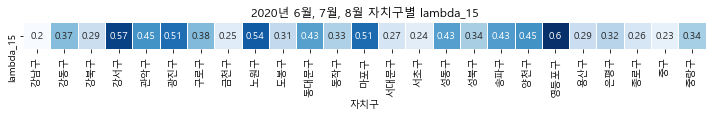

In [43]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [44]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.245338,0.456331,0.318685,0.675336,0.703823,0.855065,0.525954,0.362729,0.54009,0.348407,0.413808,0.461902,0.668018,0.369033,0.426998,0.627432,0.413176,0.491443,0.480837,0.838632,0.396911,0.488717,0.306524,0.261869,0.392131


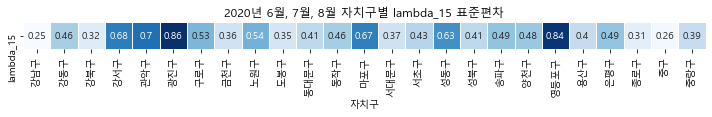

In [45]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [46]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.208475,0.363541,0.290026,0.567457,0.450471,0.504893,0.374713,0.249043,0.533791,0.299014,0.421134,0.325196,0.513106,0.271976,0.249831,0.421741,0.338298,0.430336,0.443033,0.6049,0.288091,0.307826,0.285507,0.247164,0.328426


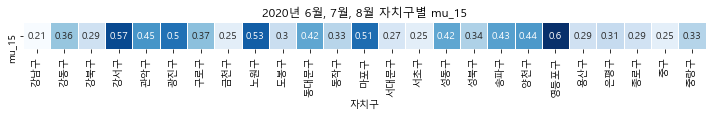

In [47]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [48]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.253606,0.428591,0.314815,0.656288,0.677781,0.808831,0.525103,0.354134,0.532796,0.329651,0.394974,0.416344,0.646305,0.334349,0.413237,0.588624,0.3795,0.487197,0.459861,0.823256,0.381204,0.423611,0.33738,0.287821,0.351372


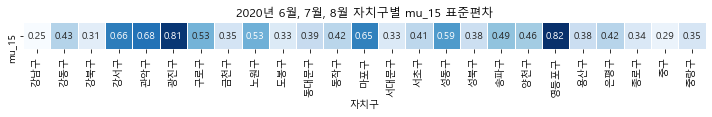

In [49]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [50]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.071677,1.166515,1.081196,1.243928,1.055983,1.057528,1.173699,1.47632,1.100845,1.178057,1.131545,1.057437,1.159962,1.021957,1.070769,1.180521,1.098741,1.127056,1.128593,1.181374,1.082547,1.106917,1.060411,1.078938,1.084531


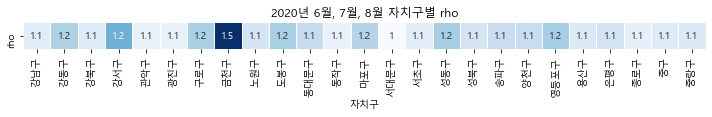

In [51]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 rho')
plt.tight_layout()
plt.show()

In [52]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.771668,1.838141,1.355142,3.045373,2.450987,2.741915,1.887586,1.05,2.647193,1.486538,2.143315,1.753743,2.676874,1.227037,1.151449,2.200711,1.67808,2.228288,2.43033,3.320334,1.555937,1.735564,1.3095,1.015211,1.730795


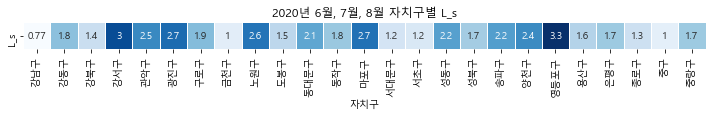

In [53]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [54]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.142798,2.170634,1.509295,3.12317,3.980678,4.943711,2.344609,1.303989,2.51507,1.661626,1.817465,2.451171,3.38117,1.776933,2.249995,2.985494,1.96828,2.418246,2.209182,4.736471,1.959355,2.835126,1.323135,1.03622,1.907423


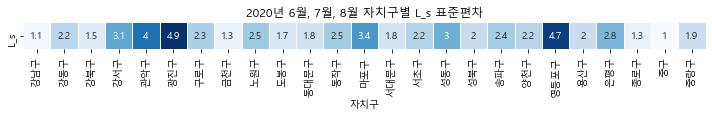

In [55]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [56]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,8.094651,11.152159,9.32688,16.000828,10.093942,13.066703,13.381721,18.894175,11.062061,13.215411,11.889705,11.363565,14.186994,9.90994,10.517541,13.901456,9.462763,13.809091,15.661438,17.481953,12.652812,11.971085,18.341236,17.152729,9.764778


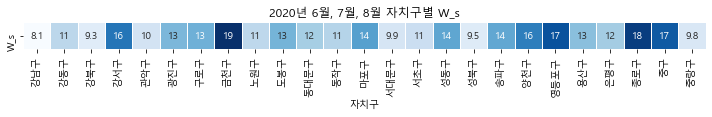

In [57]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [58]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,17.392224,25.112222,12.68105,33.96304,16.437975,35.699349,26.233254,62.568676,20.707736,28.115522,20.060958,29.059641,27.939281,17.922548,27.285105,29.947623,13.686031,31.314632,32.42001,49.718019,28.138147,29.559016,57.73553,56.651987,15.602517


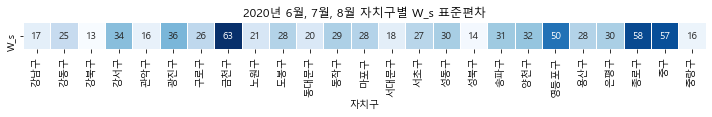

In [59]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [60]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2040,흑석한강푸르지오 106동앞
2041,흑석한강푸르지오(110동)
2042,흥국사 정류장
2043,희성오피앙


In [61]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [62]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
960,강서구,KC 대학교,0,0.105978,0.027174,3.900000,0.795918,36.800000,학교
961,강서구,KC 대학교,1,0.081522,0.008152,10.000000,0.909091,122.666667,학교
962,강서구,KC 대학교,2,0.105978,0.010870,9.750000,0.906977,92.000000,학교
963,강서구,KC 대학교,3,0.054348,0.027174,2.000000,0.666667,36.800000,학교
964,강서구,KC 대학교,4,0.043478,0.046196,0.941176,0.484848,21.647059,학교
...,...,...,...,...,...,...,...,...,...
48883,동대문구,휘봉고등학교 앞,19,0.421196,0.456522,0.922619,0.946365,3.241633,학교
48884,동대문구,휘봉고등학교 앞,20,0.315217,0.413043,0.763158,0.821966,3.468971,학교
48885,동대문구,휘봉고등학교 앞,21,0.415761,0.339674,1.224000,1.133840,4.564259,학교
48886,동대문구,휘봉고등학교 앞,22,0.453804,0.201087,2.256757,1.490191,8.418975,학교


In [63]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.247283,0.211957,1.166667,1.691403,9.918837,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.149457,0.247283,0.604396,0.911826,6.784802,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.165761,0.173913,0.953125,1.440028,11.316035,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.089674,0.092391,0.970588,1.462693,21.431681,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.062500,0.059783,1.045455,1.555534,33.950087,지하철
...,...,...,...,...,...,...,...,...,...
48979,동작구,흑석역 4번출구,19,0.554348,0.709239,0.781609,1.197178,2.590626,지하철
48980,동작구,흑석역 4번출구,20,0.581522,0.510870,1.138298,1.661153,4.083460,지하철
48981,동작구,흑석역 4번출구,21,0.543478,0.538043,1.010101,1.512563,3.729624,지하철
48982,동작구,흑석역 4번출구,22,0.644022,0.445652,1.445122,1.943433,5.026509,지하철


In [64]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
456,서대문구,DMC센트럴아이파크아파트,0,0.222826,0.154891,1.438596,1.237250,10.264799,아파트
457,서대문구,DMC센트럴아이파크아파트,1,0.187500,0.135870,1.380000,1.211091,11.627563,아파트
458,서대문구,DMC센트럴아이파크아파트,2,0.108696,0.111413,0.975610,0.983540,13.408010,아파트
459,서대문구,DMC센트럴아이파크아파트,3,0.057065,0.070652,0.807692,0.858689,20.477905,아파트
460,서대문구,DMC센트럴아이파크아파트,4,0.038043,0.043478,0.875000,0.911243,33.733333,아파트
...,...,...,...,...,...,...,...,...,...
48163,서대문구,홍은센트레빌 아파트 앞,19,0.160326,0.312500,0.513043,0.000000,0.000000,아파트
48164,서대문구,홍은센트레빌 아파트 앞,20,0.097826,0.228261,0.428571,0.000000,0.000000,아파트
48165,서대문구,홍은센트레빌 아파트 앞,21,0.144022,0.146739,0.981481,0.000000,0.000000,아파트
48166,서대문구,홍은센트레빌 아파트 앞,22,0.127717,0.111413,1.146341,0.000000,0.000000,아파트


In [65]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2520,마포구,가온문화공원,0,0.062500,0.070652,0.884615,1.347396,27.153718,공원
2521,마포구,가온문화공원,1,0.062500,0.029891,2.090909,2.304163,82.024766,공원
2522,마포구,가온문화공원,2,0.021739,0.046196,0.470588,0.682606,33.333815,공원
2523,마포구,가온문화공원,3,0.010870,0.027174,0.400000,0.561576,53.784615,공원
2524,마포구,가온문화공원,4,0.032609,0.032609,1.000000,1.500000,61.333333,공원
...,...,...,...,...,...,...,...,...,...
48811,중구,훈련원공원주차장 앞,19,0.201087,0.277174,0.725490,1.110127,6.456789,공원
48812,중구,훈련원공원주차장 앞,20,0.239130,0.301630,0.792793,1.214102,6.121993,공원
48813,중구,훈련원공원주차장 앞,21,0.244565,0.464674,0.526316,0.778667,3.441291,공원
48814,중구,훈련원공원주차장 앞,22,0.192935,0.377717,0.510791,0.751936,4.190525,공원


In [66]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.105978,0.027174,3.900000,0.795918,36.800000,학교
1,강서구,KC 대학교,1,0.081522,0.008152,10.000000,0.909091,122.666667,학교
2,강서구,KC 대학교,2,0.105978,0.010870,9.750000,0.906977,92.000000,학교
3,강서구,KC 대학교,3,0.054348,0.027174,2.000000,0.666667,36.800000,학교
4,강서구,KC 대학교,4,0.043478,0.046196,0.941176,0.484848,21.647059,학교
...,...,...,...,...,...,...,...,...,...
19795,중구,훈련원공원주차장 앞,19,0.201087,0.277174,0.725490,1.110127,6.456789,공원
19796,중구,훈련원공원주차장 앞,20,0.239130,0.301630,0.792793,1.214102,6.121993,공원
19797,중구,훈련원공원주차장 앞,21,0.244565,0.464674,0.526316,0.778667,3.441291,공원
19798,중구,훈련원공원주차장 앞,22,0.192935,0.377717,0.510791,0.751936,4.190525,공원


In [67]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.336904  0.243442  0.158288  0.107389  0.080189  0.063388  0.100387   
아파트  0.321103  0.228441  0.158509  0.103246  0.068220  0.050564  0.062650   
지하철  0.445778  0.349483  0.248959  0.166344  0.113640  0.114449  0.200676   
학교   0.287646  0.217078  0.142538  0.091054  0.065552  0.043541  0.058173   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.186951  0.332854  0.218463  0.194346  0.212688  0.260138  0.268891   
아파트  0.139608  0.257657  0.156092  0.147265  0.174318  0.216340  0.225994   
지하철  0.408609  0.619638  0.406959  0.329222  0.372833  0.441331  0.468836   
학교   0.131062  0.261894  0.181145  0.151965  0.160431  0.207755  0.221969   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.293452  0.338132  0.426212  0.572168  0.830111  0.765207  0.725047   
아파트  0.233756  0.269277  0.334870  0.465079  0.687020  0.650733  0.561014   
지하철  0.487328  0.554547  0.673529  0.918173  1.226113  1.029335  0.928718   
학교   0.225188  0.251923  0.297345  0.397136  0.582274  0.542329  0.480895   

                                   
시간         21        22        23  
특성                                 
공원   0.724394  0.679374  0.491508  
아파트  0.582347  0.584614  0.446673  
지하철  0.918081  0.847375  0.612175  
학교   0.496049  0.504640  0.389716

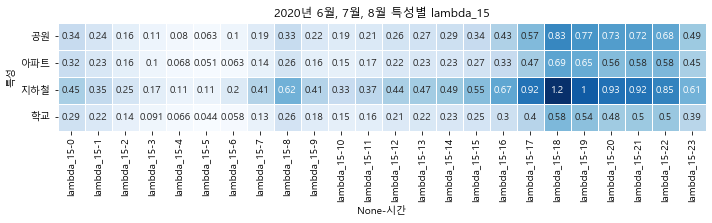

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.325645  0.238720  0.162910  0.106737  0.079251  0.066401  0.101442   
아파트  0.268575  0.198002  0.144571  0.096588  0.065345  0.051883  0.073223   
지하철  0.466121  0.335768  0.232825  0.156074  0.103316  0.110168  0.216469   
학교   0.283788  0.216942  0.150960  0.097942  0.068281  0.043953  0.059113   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.227591  0.349449  0.222755  0.203705  0.197208  0.235807  0.249571   
아파트  0.236832  0.505174  0.174392  0.151154  0.164590  0.212910  0.211863   
지하철  0.453741  0.661895  0.389312  0.294800  0.330581  0.382366  0.401566   
학교   0.132614  0.299445  0.200986  0.157692  0.148667  0.191578  0.201074   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.268864  0.312896  0.382020  0.507853  0.719880  0.688106  0.709974   
아파트  0.211049  0.244111  0.297628  0.396769  0.599161  0.588315  0.541673   
지하철  0.418886  0.491667  0.619419  0.878922  1.171815  1.121773  1.209125   
학교   0.213440  0.242708  0.287210  0.395521  0.584565  0.569702  0.525798   

                                   
시간         21        22        23  
특성                                 
공원   0.694706  0.647559  0.471199  
아파트  0.562078  0.525569  0.374357  
지하철  1.230885  1.080228  0.718356  
학교   0.516347  0.501491  0.385501

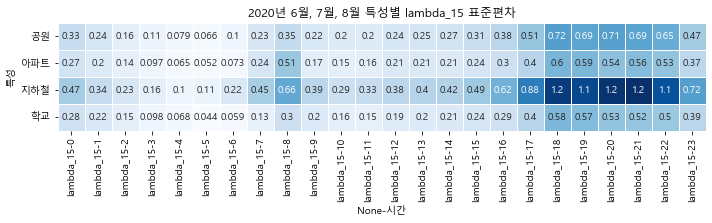

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.259589  0.190374  0.120793  0.074833  0.057327  0.089596  0.180184   
아파트  0.248874  0.185819  0.122598  0.081732  0.058552  0.084314  0.172817   
지하철  0.419227  0.306575  0.220672  0.152187  0.101405  0.090277  0.159312   
학교   0.212166  0.155560  0.105414  0.068227  0.049122  0.063002  0.140238   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.376881  0.426029  0.272915  0.233670  0.249504  0.281276  0.290500   
아파트  0.335665  0.384188  0.229792  0.195772  0.207242  0.235798  0.246997   
지하철  0.372853  0.631098  0.383556  0.323887  0.369353  0.434657  0.470414   
학교   0.287709  0.350397  0.218165  0.198328  0.202989  0.219732  0.241722   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.308946  0.371577  0.473662  0.630304  0.807509  0.702681  0.694320   
아파트  0.263437  0.294349  0.368469  0.494130  0.635479  0.582648  0.548883   
지하철  0.509431  0.601505  0.721786  1.016642  1.331409  1.067299  0.956190   
학교   0.253951  0.301087  0.369586  0.452613  0.539381  0.486580  0.459678   

                                   
시간         21        22        23  
특성                                 
공원   0.638927  0.517924  0.348610  
아파트  0.506020  0.427456  0.296901  
지하철  0.908172  0.765290  0.556548  
학교   0.431835  0.373537  0.270736

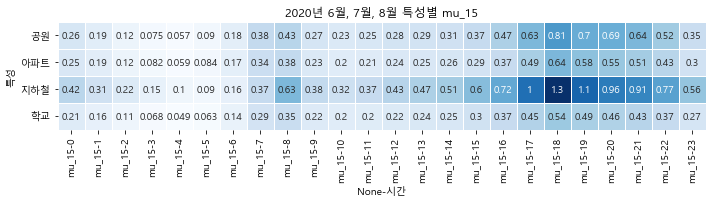

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [73]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.240667  0.175483  0.115436  0.072307  0.054397  0.082406  0.176581   
아파트  0.216511  0.159860  0.110259  0.076152  0.059569  0.081098  0.161174   
지하철  0.439381  0.302696  0.214926  0.148002  0.098491  0.083237  0.151974   
학교   0.218959  0.160347  0.112591  0.070972  0.057538  0.075448  0.157418   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.339050  0.367774  0.228524  0.181735  0.192909  0.221089  0.249756   
아파트  0.300001  0.362206  0.191076  0.157199  0.207454  0.204618  0.206900   
지하철  0.381406  0.640828  0.323103  0.256230  0.300984  0.350714  0.380790   
학교   0.287394  0.309774  0.176239  0.148044  0.155307  0.176041  0.190922   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.262668  0.319065  0.397406  0.534021  0.729144  0.642568  0.667676   
아파트  0.216979  0.242564  0.311104  0.480928  0.565813  0.535359  0.510113   
지하철  0.434716  0.528185  0.641944  0.926867  1.221731  1.105737  1.119513   
학교   0.202177  0.258276  0.312930  0.401636  0.524001  0.483039  0.473972   

                                   
시간         21        22        23  
특성                                 
공원   0.629386  0.484970  0.329193  
아파트  0.488854  0.402767  0.279569  
지하철  1.163280  0.982841  0.680287  
학교   0.471394  0.406973  0.294830

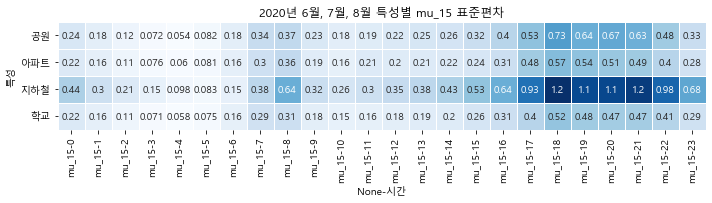

In [74]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [75]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.379759  1.433804  1.398410  1.644134  1.666754  1.034001  1.128777   
아파트  1.412033  1.362940  1.398384  1.403578  1.451100  0.735469  0.516607   
지하철  1.037419  1.166739  1.180959  1.174238  1.376408  1.763329  1.587741   
학교   1.528765  1.679531  1.593849  1.451098  1.686867  1.193244  0.820456   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.768541  0.949686  0.923207  0.810915  0.864399  0.918754  0.947760   
아파트  0.496720  0.615651  0.665433  0.723966  0.793121  0.891542  0.843391   
지하철  1.282682  1.095206  1.096493  1.014430  0.998365  1.013285  0.980966   
학교   1.147507  1.209228  0.933582  0.773076  0.790267  0.907132  0.893869   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.915620  0.890294  0.869411  0.877628  1.072147  1.087892  1.043350   
아파트  0.826290  0.887742  0.864547  0.975625  1.121448  1.129167  1.037806   
지하철  0.958017  0.921254  0.936450  0.905345  0.944568  0.948312  0.940821   
학교   0.831271  0.811861  0.781810  0.866132  1.097202  1.111331  1.029656   

                                   
시간         21        22        23  
특성                                 
공원   1.163299  1.340593  1.476651  
아파트  1.189977  1.376559  1.690220  
지하철  1.009541  1.107407  1.141156  
학교   1.216565  1.508278  1.695878

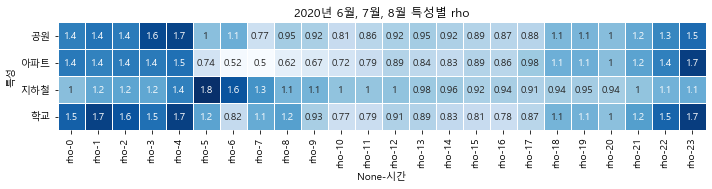

In [76]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 rho')
plt.tight_layout()
plt.show()

In [77]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.509395  2.535230  2.443914  2.555437  2.607861  1.334103  1.154007   
아파트  2.000407  1.979530  2.031815  2.017516  1.831108  1.064383  0.591510   
지하철  2.859850  3.111321  3.074925  3.121863  3.104577  3.345977  3.132810   
학교   1.689666  1.690773  1.651378  1.604535  1.611732  1.002704  0.693925   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.005015  1.546898  1.367490  1.448160  1.572297  1.798932  1.708617   
아파트  0.666470  0.941574  1.028835  1.101604  1.341409  1.483929  1.448937   
지하철  2.848151  2.469095  2.762699  2.700014  2.844974  2.953618  2.729520   
학교   0.733147  0.979427  1.029338  0.963649  1.088282  1.306397  1.256551   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.857131  1.791974  1.802031  1.904729  2.128458  2.170660  2.102350   
아파트  1.378330  1.455687  1.447136  1.566461  1.753872  1.781412  1.637428   
지하철  2.445399  2.386344  2.538412  2.438680  2.549445  2.655177  2.695373   
학교   1.250436  1.152479  1.157979  1.277608  1.479851  1.498022  1.443931   

                                   
시간         21        22        23  
특성                                 
공원   2.310768  2.550722  2.601225  
아파트  1.851940  2.085627  2.208404  
지하철  2.802343  3.095686  2.961984  
학교   1.547165  1.739834  1.776979

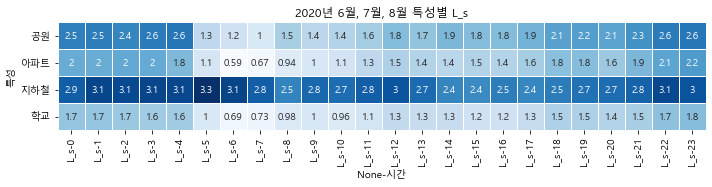

In [78]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 L_s')
plt.tight_layout()
plt.show()

In [79]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.774591  2.978306  2.783131  2.910594  3.281093  2.188156  1.821587   
아파트  2.181254  2.213656  2.274904  2.320399  2.179351  1.436176  1.065797   
지하철  3.488894  3.571609  3.614872  4.431966  4.015602  5.387283  4.511807   
학교   2.100374  2.058200  2.092795  1.976015  2.238702  1.460823  1.265002   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   2.049678  2.562155  1.684717  1.796286  1.921704  2.121459  1.804972   
아파트  1.202720  1.391146  1.339423  1.252846  1.526337  1.676276  1.538090   
지하철  4.391041  3.026178  3.956434  3.829901  3.971531  4.835388  3.401001   
학교   1.363032  1.622191  1.592712  1.525364  1.517451  1.691380  1.570719   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.981943  1.961666  1.951283  2.049688  2.371598  2.229122  2.201827   
아파트  1.338502  1.506947  1.514521  1.534937  1.818146  1.786214  1.680079   
지하철  2.343297  2.901406  3.215083  3.335473  3.743757  4.083692  4.458519   
학교   1.618351  1.498209  1.442545  1.670918  1.911999  1.948174  1.869334   

                                   
시간         21        22        23  
특성                                 
공원   2.479568  2.784044  2.812782  
아파트  1.938055  2.169962  2.293523  
지하철  4.187400  4.369616  3.921459  
학교   1.864173  2.122989  2.165056

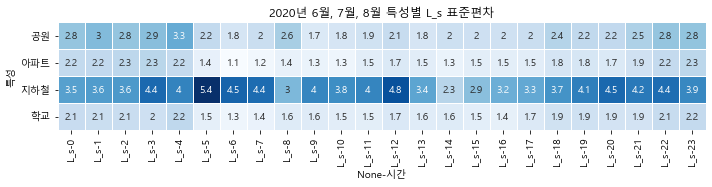

In [80]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [81]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   12.190259  20.866209  34.539097  51.634663  67.565273  36.017298   
아파트   9.101869  12.966884  20.900232  34.380879  47.773194  28.099921   
지하철   8.715813  14.592549  21.348565  34.177656  50.172375  59.739714   
학교   10.129495  16.222210  21.887942  34.016688  50.790205  41.925772   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   20.870334   6.712756  6.001816  8.236585  8.423229  7.824134  7.580280   
아파트  10.745213   5.683104  4.923890  7.386440  8.503197  8.886655  7.898153   
지하철  29.320095  11.611454  5.875446  8.564786  9.196099  8.513661  7.186316   
학교   19.687159   7.810261  6.033118  7.048453  7.426059  7.458364  6.953325   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   7.197930  7.067856  5.939578  4.653776  3.698484  3.182815  3.574137   
아파트  7.468256  6.855035  6.128784  4.957612  4.051891  3.184357  3.333615   
지하철  6.398711  5.863404  4.919801  4.169502  2.998318  2.298332  2.905128   
학교   6.385479  5.911505  4.997967  4.155262  3.525620  3.068598  3.398220   

                                             
시간         20        21        22        23  
특성                                           
공원   3.630596  4.238765  5.469192  8.373643  
아파트  3.379613  3.911569  4.966662  7.763285  
지하철  3.385414  3.772518  4.968501  6.866199  
학교   3.626735  4.180163  5.272446  7.773922

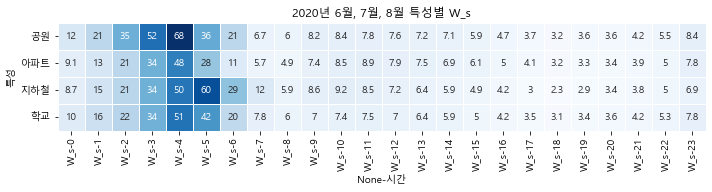

In [82]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 W_s')
plt.tight_layout()
plt.show()

In [83]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   11.157410  37.609241  52.987530  60.774524  81.688291  49.428639   
아파트   8.502905  13.402652  24.916670  46.098969  57.681174  37.466204   
지하철   7.364662  21.507906  45.082631  64.345767  63.520978  99.727476   
학교   11.689370  26.467538  29.415576  48.935348  77.926029  92.877420   

                                                                              \
시간          6          7          8         9         10        11        12   
특성                                                                             
공원   40.078258   8.579135   6.134674  6.871847  5.274639  4.614187  4.682655   
아파트  14.707052   7.738273   5.109008  6.151344  6.394258  6.829325  5.620394   
지하철  34.045631  14.440094   5.279372  6.427833  5.673059  5.282400  4.518783   
학교   50.523322  22.322181  12.035787  6.991014  8.276450  6.547741  5.262070   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   4.220068  4.062678  3.579986  2.797880  2.326829  2.189164  2.143929   
아파트  5.833175  4.993439  4.320970  3.486615  2.910421  2.176731  2.146179   
지하철  3.502484  3.324029  2.793762  2.354757  1.819244  1.353330  1.482687   
학교   4.721514  4.205616  3.582330  3.036202  2.654931  2.191953  2.764677   

                                             
시간         20        21        22        23  
특성                                           
공원   2.129210  2.518517  3.436840  5.357460  
아파트  2.106055  2.526154  3.377913  5.851437  
지하철  1.873970  2.159118  3.683458  5.967944  
학교   2.896872  3.223465  4.791009  7.842184

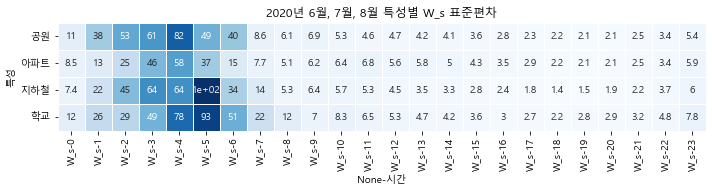

In [84]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월, 7월, 8월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()